In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import primepi, li, mobius,sqrt,log,summation

In [2]:
def RiemannApproximation(x, max_terms=1000):
    R_x = 0
    for n in range(1, max_terms + 1):
        mu_n = mobius(n)  # Compute Möbius function
        if mu_n != 0:  # Only consider non-zero Möbius values
            R_x += mu_n / n * float(li(x**(1/n)))
    return float(R_x)

In [5]:

x_values = np.arange(10, 1000, 1) 

# Actual prime counting function
pi_values = np.array([primepi(x) for x in x_values])

# Approximation 1: x / ln(x)
approx1 = x_values / np.log(x_values)

# Approximation 2: Logarithmic integral Li(x)
approx2 = np.array([float(li(x)) for x in x_values])

# Approximation 3: R(x) using Möbius terms
approx3 = np.array([RiemannApproximation(x, max_terms=50) for x in x_values])

# Compute the error terms
error1 = pi_values - approx1
error2 = pi_values - approx2
error3 = pi_values - approx3

# Plot actual vs approximations
plt.figure(figsize=(12, 6))
plt.plot(x_values, pi_values, label=r"$\pi(x)$ (Actual)", color="black")
plt.plot(x_values, approx1, label=r"$x / \ln(x)$", linestyle="--")
plt.plot(x_values, approx2, label=r"$\mathrm{Li}(x)$", linestyle="--")
plt.plot(x_values, approx3, label=r"$R(x)$ (Möbius Approximation)", linestyle="--")
plt.xlabel(r"$x$")
plt.ylabel(r"Count / Approximation")
plt.title("Comparison of $\pi(x)$ with Approximations")
plt.legend()
plt.grid(True)
plt.show()

# Plot errors


In [6]:
plt.figure(figsize=(12, 6))
plt.plot(x_values, error1, label=r"Error: $\pi(x) - x / \ln(x)$", linestyle="--")
plt.plot(x_values, error2, label=r"Error: $\pi(x) - \mathrm{Li}(x)$", linestyle="--")
plt.plot(x_values, error3, label=r"Error: $\pi(x) - R(x)$ (Möbius Approximation)", linestyle="--")
plt.axhline(0, color="black", linewidth=0.8, linestyle=":")
plt.xlabel(r"$x$")
plt.ylabel("Error")
plt.title("Error Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import primepi, li, sqrt, log, summation, mobius

def pi_x(x):
    return primepi(x)

def x_logx(x):
    return x / np.log(x)

def li_x(x):
    return float(li(x)) 

def r_x(x, max_terms=100):
    result = li_x(x)
    for n in range(2, max_terms + 1):
        result += mobius(n) * li_x(x ** (1 / n)) / n
    return float(result)


def rh_bound(x):
    return np.sqrt(x) * np.log(x)
def original_bound(x):
  return (x/(np.log(x)*np.log(x)))

# Generate data
x_values = np.arange(10, 1000, 10)  # Adjust range as needed
pi_values = np.array([pi_x(x) for x in x_values])
errors_x_logx = np.abs(pi_values - x_logx(x_values))
errors_li_x = np.abs(pi_values - np.array([li_x(x) for x in x_values]))
errors_r_x = np.abs(pi_values - np.array([r_x(x) for x in x_values]))

rh_bounds = rh_bound(x_values)
org_bounds=original_bound(x_values)

# Plotting the errors and RH bound
plt.figure(figsize=(10, 6))

# Error plots
plt.plot(x_values, errors_x_logx, label=r'$|E(x)| = |\pi(x) - x/\ln(x)|$', linestyle='--', color='blue')
plt.plot(x_values, errors_li_x, label=r'$|E(x)| = |\pi(x) - Li(x)|$', linestyle='-', color='green')
plt.plot(x_values, errors_r_x, label=r'$|E(x)| = |\pi(x) - R(x)|$', linestyle='-.', color='orange')

# RH Bound
plt.plot(x_values, rh_bounds, label=r'$O(\sqrt{x} \ln(x))$ (RH Bound)', linestyle=':', color='red')
plt.plot(x_values,org_bounds,label=r'$O(x/ \ln^2(x))$ (Original Bound)',linestyle=':',color='yellow')

# Plot settings
plt.xscale('log')  # Logarithmic x-scale for better visualization
plt.yscale('log')  # Logarithmic y-scale for error comparison
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$|E(x)|$', fontsize=12)
plt.title(r'Error Comparison and RH Bound', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


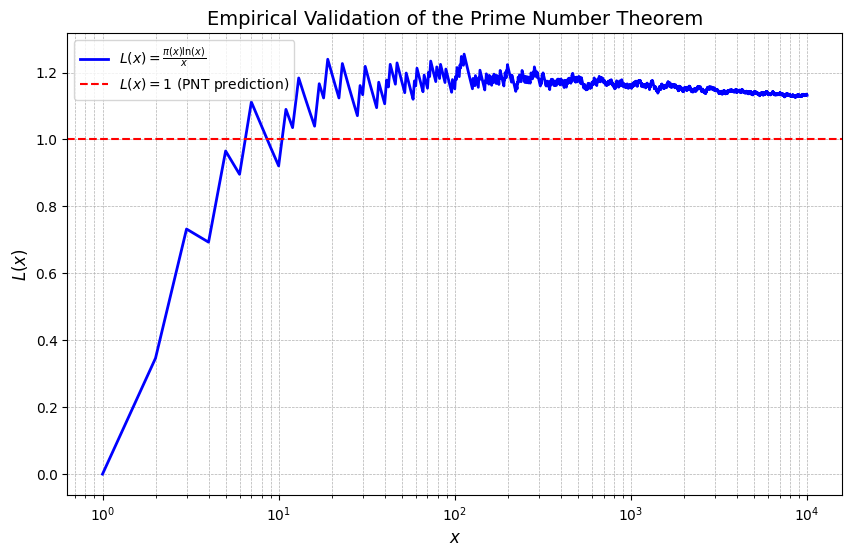

In [10]:

def pnt_ratio(x):
    return primepi(x) * np.log(x) / x

# Generate data for increasing x values
x_values = np.arange(1, 10000, 1)  # Adjust the range as needed
l_values = [pnt_ratio(x) for x in x_values]

# Plot the results
plt.figure(figsize=(10, 6))

# Plot L(x)
plt.plot(x_values, l_values, label=r'$L(x) = \frac{\pi(x) \ln(x)}{x}$', color='blue', linewidth=2)

# Add a reference line at y=1
plt.axhline(1, color='red', linestyle='--', label=r'$L(x) = 1$ (PNT prediction)')

# Plot settings
plt.xscale('log')  # Logarithmic x-scale to better capture the trend
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$L(x)$', fontsize=12)
plt.title(r'Empirical Validation of the Prime Number Theorem', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [11]:


def approx_xlogx(x):
    return x / np.log(x)


def calculate_errors(x_values, true_function, approx_function):
    errors = []
    normalized_errors = []
    for x in x_values:
        true_val = true_function(x)
        approx_val = approx_function(x)
        error = abs(true_val - approx_val)
        norm_error = error / true_val if true_val != 0 else 0
        errors.append(error)
        normalized_errors.append(norm_error)
    return errors, normalized_errors


x_values = np.arange(10, 10000, 10)

errors_li, norm_errors_li = calculate_errors(x_values, pi_x, li_x)
errors_r, norm_errors_r = calculate_errors(x_values, pi_x, r_x)
errors_xlogx, norm_errors_xlogx = calculate_errors(x_values, pi_x, approx_xlogx)

mean_error_li = np.mean(errors_li)
mean_error_r = np.mean(errors_r)
mean_error_xlogx = np.mean(errors_xlogx)


mean_norm_error_li = np.mean(norm_errors_li)
mean_norm_error_r = np.mean(norm_errors_r)
mean_norm_error_xlogx = np.mean(norm_errors_xlogx)

print(f"Mean Error (Li(x)): {mean_error_li}")
print(f"Mean Error (R(x)): {mean_error_r}")
print(f"Mean Error (x/ln(x)): {mean_error_xlogx}")

print(f"Mean Normalized Error (Li(x)): {mean_norm_error_li}")
print(f"Mean Normalized Error (R(x)): {mean_norm_error_r}")
print(f"Mean Normalized Error (x/ln(x)): {mean_norm_error_xlogx}")

Mean Error (Li(x)): 14.5634355344669
Mean Error (R(x)): 1.32760669594624
Mean Error (x/ln(x)): 79.1467284729269
Mean Normalized Error (Li(x)): 0.0326514010788860
Mean Normalized Error (R(x)): 0.00307849856094542
Mean Normalized Error (x/ln(x)): 0.125275341181177
